In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp
from scipy.integrate import ode 
from numpy import log10 as lg
from numpy import pi as pi
from numpy import sin as sin
from numpy import cos as cos
from numpy import tan as tan
from scipy.interpolate import interp1d as sp_interp1d
from astropy import constants as const
from astropy import units as u
import math
from math import radians as radian
from numpy import linalg as LA
from scipy.special import ellipj

G=const.G.cgs.value
c=const.c.cgs.value
Ms=const.M_sun.cgs.value
hbar=const.hbar.cgs.value
m_n=const.m_n.cgs.value
km=10**5
yr=(1.0*u.yr).cgs.value

# customize the plot 
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['axes.labelpad'] = 8.0
plt.rcParams['figure.constrained_layout.h_pad'] = 0
plt.rcParams['text.usetex'] = True
plt.rc('text', usetex=True)
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.tick_params(axis='both', which='minor', labelsize=18)


plt.rcParams['xtick.major.width'] = 3

plt.rcParams['xtick.minor.width'] = 2

plt.rcParams['ytick.major.width'] = 3

plt.rcParams['ytick.minor.width'] = 2
plt.close()

"""
Convert the radiative precession problem into a triaxial precession case

the radiative torque: k, B 
the configuration of magnetic dipole: chi, eta
the intrinsic deformation: epsilon, delta
the initial angular velocity in the 1-3 plane: a

"""

def effective(k, B, chi, eta, epsilon, delta,a):
    
    R=10*km
    M=1.4*Ms
    I0=0.4*M*R**2
    I1=1; I2=1+epsilon*delta/(1+delta); I3=1+epsilon
    print(I1,I2,I3)
    em=np.array([sin(chi)*cos(eta), sin(chi)*sin(eta), cos(eta)])
    Im= -1/4 * k * B**2 * R**5 / c**2/I0 * np.tensordot(em, em, axes=0) 
    print(Im1)
    I_body=np.diag((I1,I2,I3))
    I_tol=I_body+Im
    w, v= LA.eig(I_tol)
    index=np.argsort(w)
    w=w[index]
    v=v[:,index]
    Ie1=w[0]; Ie2=w[1]; Ie3=w[2]
    deltae=(Ie2-Ie1)/(Ie3-Ie2)
    epsilone=(Ie3-Ie1)/Ie1
    omega0=np.array([sin(a),0,cos(a)])
    omegae01=np.tensordot(omega0, v[:,0],axes=1)
    omegae02=np.tensordot(omega0, v[:,1],axes=1)
    omegae03=np.tensordot(omega0, v[:,2],axes=1)
    omegae0=np.array([omegae01,omegae02, omegae03])
    chie=np.arccos(np.tensordot(em, v[:,2],axes=1))
    etae=np.arctan2(np.tensordot(em, v[:,1],axes=1), np.tensordot(em, v[:,0],axes=1))


    
    return w, v, deltae, epsilone, omegae0, chie, etae

# Zanazzi & Dong Lai

In [2]:
def omegaeff(t, chi, eta, epsilon,epsilonp,a):
    
    R=10*km
    M=1.4*Ms
    I0=0.4*M*R**2
    I1=1; I2=1; I3=1+epsilon
    em=np.array([sin(chi)*cos(eta), sin(chi)*sin(eta), cos(chi)])
    Im1=-epsilonp *  np.tensordot(em, em, axes=0) 
    I_body=np.diag((I1,I2,I3))
    I_tol=I_body+Im1
    w, v= LA.eig(I_tol)
    index=np.argsort(w)
    w=w[index]
    v=v[:,index]
    # v[:,0]=-v[:,0]
    # v[:,2]=-v[:,2]
    Ie1=w[0]; Ie2=w[1]; Ie3=w[2]
    deltae=(Ie2-Ie1)/(Ie3-Ie2)
    epsilone=(Ie3-Ie1)/Ie1
    omega0=np.array([sin(a),0,cos(a)])
    omegae01=np.tensordot(omega0, v[:,0],axes=1)
    omegae02=np.tensordot(omega0, v[:,1],axes=1)
    omegae03=np.tensordot(omega0, v[:,2],axes=1)
    omegae0=np.array([omegae01,omegae02, omegae03])
    chie=np.arccos(np.tensordot(em, v[:,2],axes=1))
    etae=np.arctan2(np.tensordot(em, v[:,1],axes=1), np.tensordot(em, v[:,0],axes=1))
    thetae0=np.arctan2(Ie3*omegae03, (Ie1**2 * omegae01**2 + Ie2**2 * omegae02**2)**(0.5))
    omegap=omegae0[2] * epsilone * (1+deltae +deltae * epsilone)**(-0.5)
    m=deltae * (1+epsilone)* (tan(thetae0))**2

    u1=omegae0[0]*ellipj(omegap*t,m)[1]
    u2=
    u3=omegae0[2]*ellipj(omegap*t,m)[2]
    


    return omegae0, u1, u3, u3


In [3]:
t=np.linspace(0,2*10**12,1000)
chi=radian(10); eta=0; epsilon=1e-11; epsilonp=2.4e-12; a=radian(50)
u1=np.zeros(t.size); u3=np.zeros(t.size)
omegae0, u1,u3=omegaeff(t,chi, eta, epsilon,epsilonp,a)

(-0.64, -0.56)

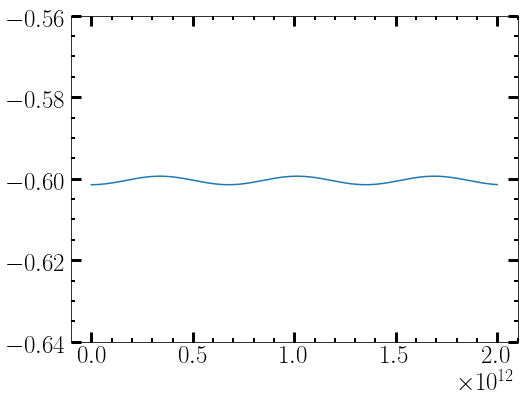

In [8]:
plt.figure(figsize=(8,6))
plt.plot(t,u3)
plt.minorticks_on()
plt.ylim(-0.64,-0.56)

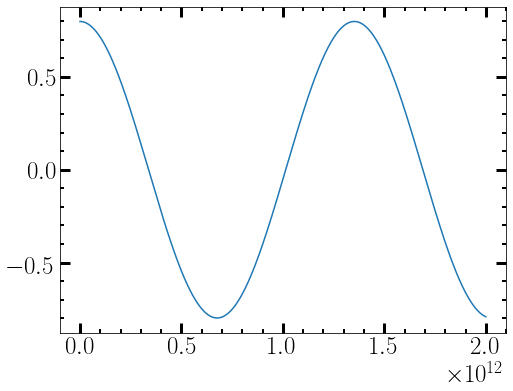

In [5]:
plt.figure(figsize=(8,6))
plt.plot(t,-u1)
plt.minorticks_on()